In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "/home/paperspace/projects/age_detection/"
sz=128

In [4]:
os.listdir(PATH)

['test', 'valid', 'train']

In [5]:
os.listdir(f'{PATH}valid')

['MIDDLE', 'YOUNG', 'OLD']

In [6]:
files = os.listdir(f'{PATH}valid/MIDDLE')[:5]
files

['MIDDLE.1161.jpg',
 'MIDDLE.1080.jpg',
 'MIDDLE.336.jpg',
 'MIDDLE.618.jpg',
 'MIDDLE.1075.jpg']

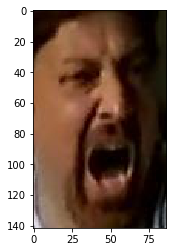

In [7]:
img = plt.imread(f'{PATH}valid/MIDDLE/{files[0]}')
plt.imshow(img);

In [8]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

100%|██████████| 19/19 [00:01<00:00, 16.62it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.826515   0.86269    0.621141  
    1      0.780254   0.839321   0.616713                    



[0.83932143, 0.6167130564388476]

In [9]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [10]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 77%|███████▋  | 226/293 [00:04<00:01, 55.95it/s, loss=4.6] 


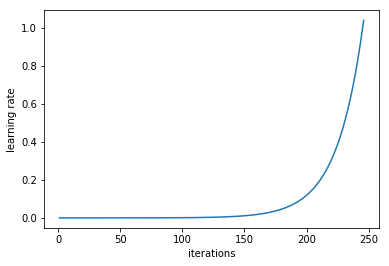

In [11]:
learn.sched.plot_lr()

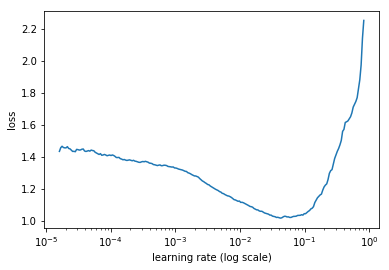

In [12]:
learn.sched.plot()

In [13]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [21]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 104/104 [00:06<00:00, 16.40it/s]


In [22]:
learn.fit(1e-2, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.816636   0.852069   0.629428  



[0.85206866, 0.6294281388583937]

In [23]:
learn.precompute=False

In [24]:
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.788082   0.824628   0.639676  
    1      0.776263   0.814148   0.645812                    
    2      0.759318   0.801401   0.646255                    



[0.80140066, 0.6462550602461162]

In [25]:
learn.save('age_det1')

In [26]:
learn.load('age_det1')

In [27]:
learn.unfreeze()

In [28]:
lr=np.array([1e-4,1e-3,1e-2])

In [20]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.749142   0.807787   0.633793  
    1      0.681359   0.690628   0.697179                    
    2      0.611451   0.679932   0.708629                    
    3      0.581109   0.625195   0.738993                    
    4      0.529727   0.559654   0.762842                    
    5      0.462178   0.558525   0.765309                    
    6      0.456701   0.551289   0.766131                    



[0.5512892, 0.7661310716679222]

In [29]:
#First iteration
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.736882   0.800084   0.657262  
    1      0.672638   0.710121   0.700025                    
    2      0.607335   0.669473   0.713626                    
    3      0.587359   0.619219   0.737411                    
    4      0.513401   0.567842   0.750569                    
    5      0.47273    0.533568   0.771129                    
    6      0.45453    0.535593   0.774798                    



[0.53559315, 0.7747975713328311]

In [31]:
learn.save('age-det1')

In [32]:
learn.load('age-det1')

In [52]:
#Second iteration
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.469182   0.521265   0.787513  
    1      0.425894   0.472799   0.81794                     
    2      0.399227   0.459892   0.820407                    
    3      0.390395   0.449307   0.817118                    
    4      0.347488   0.425112   0.838499                    
    5      0.298523   0.423167   0.840144                    
    6      0.289363   0.438955   0.839322                    



[0.43895507, 0.8393218611416063]

In [53]:
learn.save('age-det2')

In [54]:
learn.load('age-det2')

In [64]:
#Third iteration
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.315333   0.422961   0.850013  
    1      0.299614   0.413891   0.847546                    
    2      0.256501   0.419596   0.848368                    
    3      0.284518   0.412323   0.85248                     
    4      0.237052   0.387937   0.862728                    
    5      0.220558   0.381874   0.875886                    
    6      0.208801   0.384014   0.873861                    



[0.38401404, 0.873861334825817]

In [65]:
learn.save('age-det3')

In [66]:
learn.load('age-det3')

In [76]:
#Fourth iteration
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.210419   0.375576   0.868105  
    1      0.223652   0.405438   0.871331                    
    2      0.179845   0.3898     0.866017                    
    3      0.21202    0.401682   0.86064                     
    4      0.169536   0.383057   0.866903                    
    5      0.154452   0.396017   0.872217                    
    6      0.143188   0.387372   0.873039                    



[0.38737163, 0.8730389664047643]

In [77]:
learn.save('age-det4')

In [78]:
learn.load('age-det4')

In [79]:
log_preds = learn.predict(is_test=True)
log_preds.shape

(6636, 3)

In [80]:
log_preds = np.argmax(log_preds,axis=1)
log_preds

array([0, 0, 2, ..., 0, 0, 0])

In [81]:
import pandas as pd

In [36]:
data.classes

['MIDDLE', 'OLD', 'YOUNG']

In [40]:
data.classes[log_preds[0]]

'MIDDLE'

In [82]:
arr=[]
for i in range(log_preds.shape[0]):
    arr.append(data.classes[log_preds[i]])
arr

['MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'OLD',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'OLD',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'OLD',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'OLD',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'OLD',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'OLD',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'OLD',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'OLD',
 'M

In [83]:
df2 = pd.DataFrame(arr)

In [84]:
df2.insert(1,'ID',[ item[5:] for item in data.test_ds.fnames ] )

In [85]:
df2.columns = ['Class','ID']

In [86]:
df2.head()

,Class,ID
0,MIDDLE,9885.jpg
1,MIDDLE,11231.jpg
2,YOUNG,17718.jpg
3,MIDDLE,26049.jpg
4,MIDDLE,17201.jpg


In [87]:
df2.to_csv('Age-4.csv', index=False)